# Turtle Games Customer Review Analysis

Turtle Games is looking to improve overall sales performance by understanding customer trends. They are looking to understand:
- how customers accumulate loyalty points
- how groups within the customer base can be used to target specific market segments 
- how social data (e.g. customer reviews) can be used to inform marketing campaigns
- the impact that each product has on sales
- how reliable the data is (e.g. normal distribution, skewness, or kurtosis)
- what the relationship(s) is/are (if any) between North American, European, and global sales.

This python notebook will answer the first three of their questions, and will be divided into three parts
- Part 1 will analyse how customers accumulate their loyalty points
- Part 2 will identify groups within the customer base
- Part 3 will analyse customer reviews to inform marketing campaigns

## Setting up the environment

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn

from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

## Part 1 - Loyalty Points

### Importing, Exploring, and Cleaning the Dataset for Simple Linear Regression

In [2]:
# Import the data set.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Describe the dataset
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [4]:
# Get informationa and check for nulls in the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Remove redundant columns
reviewsclean = reviews.drop(['language', 'platform'],axis=1)

In [6]:
# Rename column headings for easier reference
reviewsclean.rename(columns = {'remuneration (k£)':'renumeration', 'spending_score (1-100)':'spending_score'},\
                inplace = True)

In [7]:
# View the head of the cleaned dataset
reviewsclean.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [8]:
# Export the cleaned dataset
reviewsclean.to_csv('reviewscleaned.csv', index=False)

In [9]:
# Import the cleaned dataset to sense check
reviewscleaned = pd.read_csv('reviewscleaned.csv')
reviewscleaned.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


### Creating a Linear Regression Model for Age and Loyalty Points

In [10]:
# Choose dependant and independant variables.
X = reviewscleaned['age'].values.reshape(-1, 1) 
y = reviewscleaned['loyalty_points'].values 

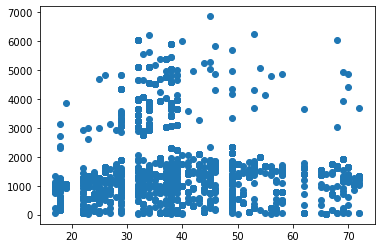

In [11]:
# Checking for linear Relationship
plt.scatter(X,y)

In [99]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [100]:
# Run the linear regression model.
lr = LinearRegression()

In [101]:
# Fit the model on the training data.
lr.fit(x_train, y_train)

LinearRegression()

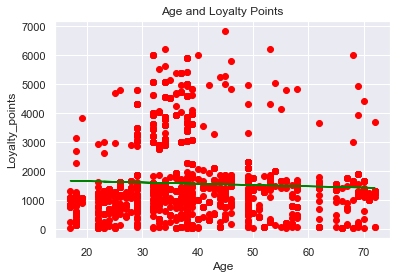

In [102]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title("Age and Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty_points")

plt.show()

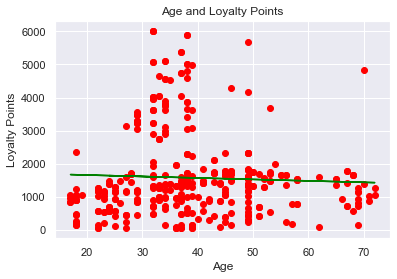

In [103]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, lr.predict(x_test), color = 'green')
plt.title("Age and Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

plt.show()

In [17]:
# Checking for linear relationships score
print (lr.score (x_train,y_train))

# Based on the evidence there is little relationship between age and loyalty points

0.002278636504490561


### Creating a Linear Regression Model for Renumeration and Loyalty Points

In [18]:
# Choose your variables.
X1 = reviewscleaned['renumeration'].values.reshape(-1, 1) 
y = reviewscleaned['loyalty_points'].values 

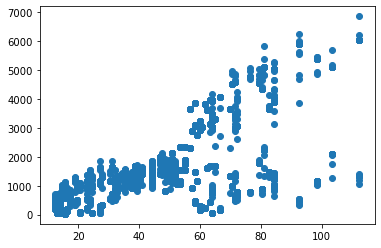

In [19]:
# Checking for linear relationship
plt.scatter(X1,y)

In [92]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(X1, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [93]:
# Run the linear regression model.
lr = LinearRegression()

In [94]:
# Fit the model on the training data.
lr.fit(x_train, y_train)

LinearRegression()

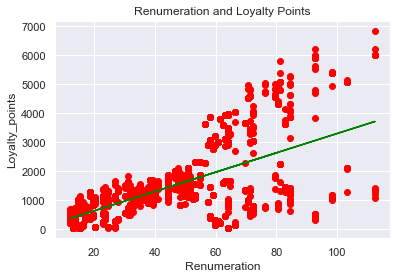

In [95]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title("Renumeration and Loyalty Points")
plt.xlabel("Renumeration")
plt.ylabel("Loyalty_points")

plt.show()

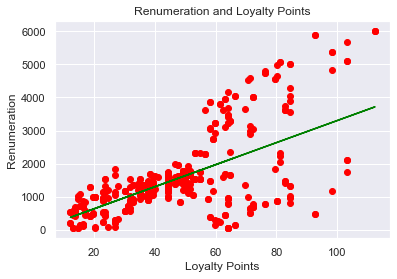

In [96]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, lr.predict(x_test), color = 'green')
plt.title("Renumeration and Loyalty Points")
plt.xlabel("Renumeration")
plt.ylabel("Loyalty Points")

plt.show()

In [25]:
# Checking for linear relationship score
print (lr.score (x_train,y_train))

# Based on the evidence there is a weak linear relationship between renumeration and loyalty points

0.3677290556822974


### Creating a Linear Regression Model for Spending Score and Loyalty Points

In [105]:
# Choose your variables.
X2 = reviewscleaned['spending_score'].values.reshape(-1, 1) 
y = reviewscleaned['loyalty_points'].values 

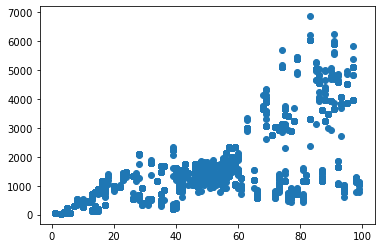

In [27]:
# Checking for Linear relationship
plt.scatter(X2,y)

In [106]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(X2, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [107]:
# Run the linear regression model.
lr = LinearRegression()

In [108]:
# Fit the model on the training data.
lr.fit(x_train, y_train)

LinearRegression()

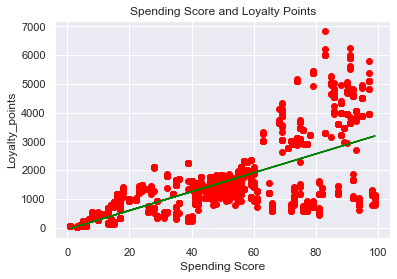

In [110]:
# Visualise the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title("Spending Score and Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty_points")

plt.show()

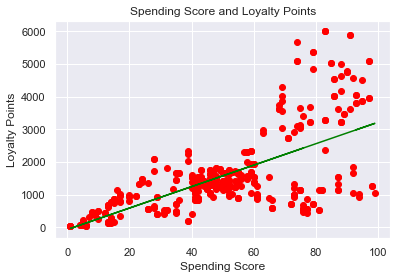

In [111]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, lr.predict(x_test), color = 'green')
plt.title("Spending Score and Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

plt.show()

In [112]:
# Checking for linear relationship score
print (lr.score (x_train,y_train))
# Based on the evidence there is a weak linear relationship between renumeration and loyalty points

0.4559018670062145


## Part 2 - Customer Groups 

In [34]:
# Creating a copy of cleaned data for Part 2 Analysis
df2 = reviewscleaned

In [35]:
# Viewing Dataframe
df2

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


### Identifying Customer Groups using clustering techniques

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

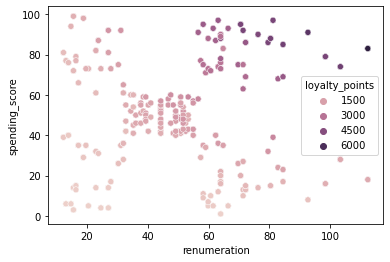

In [36]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration', y='spending_score',
                data=df2, hue='loyalty_points')

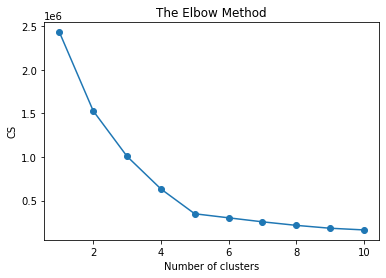

In [37]:
# Create a pairplot with Seaborn.
x = df2[['renumeration', 'spending_score']]

# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

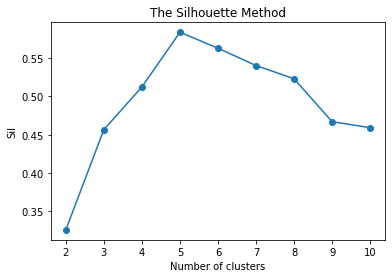

In [38]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

/var/folders/vm/m0mbrqn92kndn3vy7sxnktpm0000gn/T/ipykernel_917/3636417262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['K-Means Predicted'] = clusters


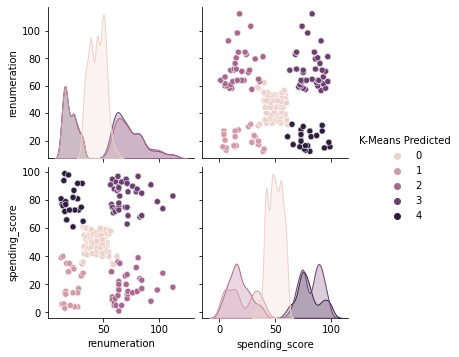

In [39]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [40]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

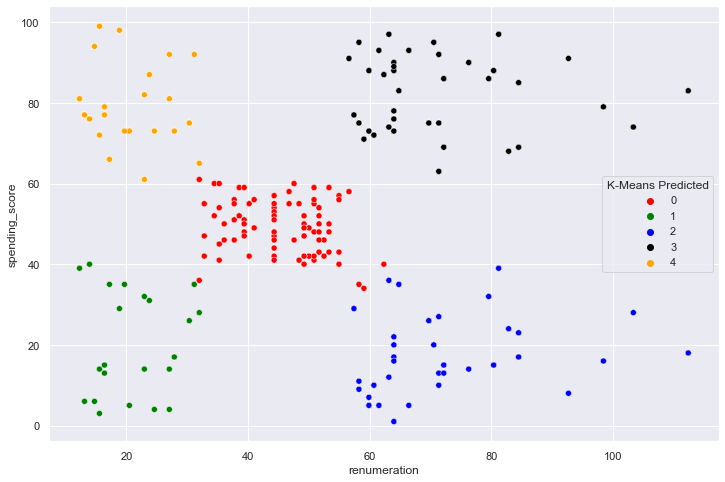

In [41]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

### Part 3 - Customer Review Analysis

In [42]:
# Creating a copy of cleaned data for Part 3 Analysis

sentiment = pd.read_csv('reviewscleaned.csv')
reviewscleaned.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [43]:
# Removing redundant columns
sentiment_clean = sentiment.drop (['renumeration', 'spending_score', 'loyalty_points', 'education', 'product','gender','age'], axis=1)

In [44]:
# Viewing the cleaned part 3 dataframe
sentiment_clean

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [45]:
#make lower case
sentiment_clean['review'] = sentiment_clean['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
sentiment_clean['summary'] = sentiment_clean['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
sentiment_clean

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it when...,super fun
1997,great game for all......... keeps the mind nim...,great game
1998,fun game!,four stars


In [46]:
#remove punctuation
sentiment_clean['review'] = sentiment_clean['review'].str.replace('[^\w\s]','')
sentiment_clean['summary'] = sentiment_clean['summary'].str.replace('[^\w\s]','')
sentiment_clean

/var/folders/vm/m0mbrqn92kndn3vy7sxnktpm0000gn/T/ipykernel_917/3307107327.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sentiment_clean['review'] = sentiment_clean['review'].str.replace('[^\w\s]','')
/var/folders/vm/m0mbrqn92kndn3vy7sxnktpm0000gn/T/ipykernel_917/3307107327.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sentiment_clean['summary'] = sentiment_clean['summary'].str.replace('[^\w\s]','')


,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


In [47]:
# Removing Duplicates
sentiment_clean.review.duplicated().sum()
sentiment_clean.summary.duplicated().sum()

649

In [48]:
#removing rows with shared duplicates
sentiment_clean = sentiment_clean.drop_duplicates(subset=(['review','summary']))
sentiment_clean.reset_index(inplace= True)
sentiment_clean

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


In [49]:
# Installing the natural language tool kit
!pip install nltk

In [50]:
# Import all the necessary packages.
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivchandaria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
# Change datatype to string
sentiment_clean = sentiment_clean.astype({'review':'string','summary':'string'})

In [52]:
#Tokenize the words
sentiment_clean['review_token'] = sentiment_clean['review'].apply(word_tokenize)
sentiment_clean['review_token'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_token, dtype: object

In [53]:
#Tokenize the words
sentiment_clean['summary_token'] = sentiment_clean['summary'].apply(word_tokenize)
sentiment_clean['summary_token'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_token, dtype: object

In [54]:
#create an empty string variable
all_summary = []
for i in range(sentiment_clean.shape[0]):
    all_summary = all_summary + sentiment_clean['summary_token'][i]

In [55]:
#create an empty string variable
all_review = []
for i in range(sentiment_clean.shape[0]):
    all_review = all_review + sentiment_clean['review_token'][i]

In [56]:
# Download the stop words.
nltk.download('stopwords')

# Import the package.
from nltk.corpus import stopwords

# Create a set of English stop words.
stop_words = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
all_review2 = [x for x in all_review if x.lower() not in stop_words]

all_review2_string = ''
#Define an empty string variable
for value in all_review2:
    all_review2_string = all_review2_string+value+' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivchandaria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
# Create a filtered list of tokens without stopwords.
all_summary2 = [x for x in all_summary if x.lower() not in stop_words]

all_summary2_string = ''
#Define an empty string variable
for value in all_summary2:
    all_summary2_string = all_summary2_string+value+' '

In [58]:
# Install WordCloud
!pip install WordCloud

In [59]:
# Import all the necessary packages
from wordcloud import WordCloud

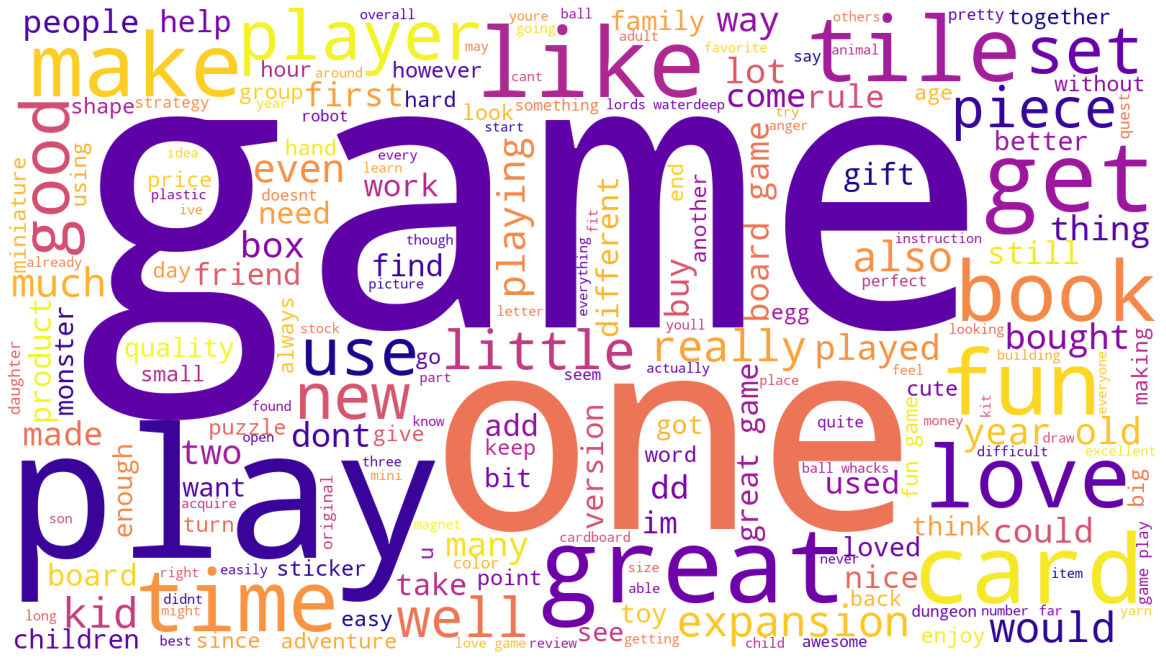

In [60]:
#Create a wordcloud for reviews
#set color palette
sns.set(color_codes=True)
#Create a wordcloud object
word_cloud_review = WordCloud(width = 1600, height = 900,
                            background_color ='white',
                            colormap = 'plasma',
                            stopwords = 'none',
                            min_font_size = 10).generate(all_review2_string)

# Plot the WordCloud image for reviews
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(word_cloud_review)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

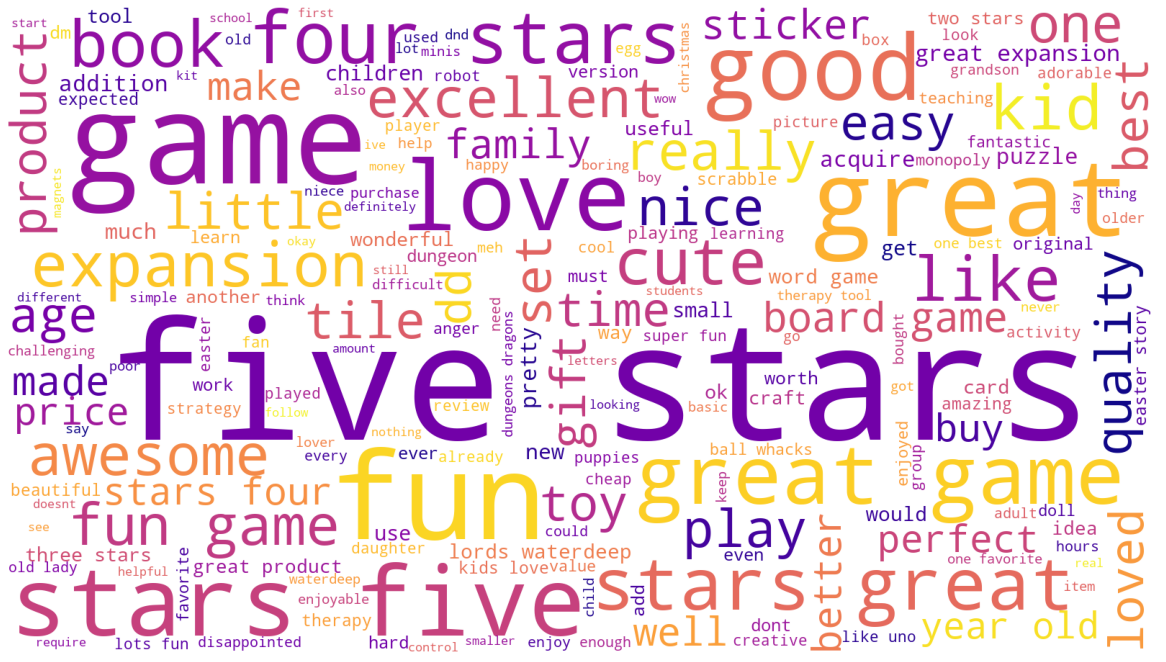

In [61]:
#Create a wordcloud for Summary
#set color palette
sns.set(color_codes=True)
#Create a wordcloud object
word_cloud_summary = WordCloud(width = 1600, height = 900,
                            background_color ='white',
                            colormap = 'plasma',
                            stopwords = 'none',
                            min_font_size = 10).generate(all_summary2_string)

# Plot the WordCloud image for reviews
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(word_cloud_summary)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [62]:
# Import  the necessary packages.
from nltk.probability import FreqDist
# Look for most common words in reviews
fdistreview = FreqDist(all_review2)
fdistreview

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [63]:
# Look for most common words in summary

fdistsummary = FreqDist(all_summary2)
fdistsummary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [64]:
#Import the Counter Class
from collections import Counter
# Generate a Dataframe from Counter
countsreview = pd.DataFrame(Counter(all_review2).most_common(15),
                     columns= ['Word','Frequency']).set_index('Word')
# Display the result
countsreview

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


In [65]:
# Generate a Dataframe from Counter
countssummary = pd.DataFrame(Counter(all_summary2).most_common(15),
                     columns= ['Word','Frequency']).set_index('Word')
# Display the result
countssummary

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


In [66]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shivchandaria/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [67]:
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
darth_vader = SentimentIntensityAnalyzer()

In [71]:
# Run through a dictionary comprehension to take every review 

all_review2_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in sentiment_clean['review_token']}

In [72]:
# Analyse the sentiment of each review
reviewpolarity_pd = pd.DataFrame(all_review2_polarity).T

# View the DataFrame.
reviewpolarity_pd

,neg,neu,pos,compound
when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely,0.108,0.833,0.059,-0.6333
an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,0.101,0.695,0.205,0.9404
nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm giants one is decent for a few tables it includes but really misses the mark maybe they should ask a few dms what they would use,0.136,0.711,0.153,-0.0045
amazing buy bought it as a gift for our new dm and its perfect,0.000,0.490,0.510,0.8860
as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money,0.203,0.797,0.000,-0.6808
...,...,...,...,...
we are retired and find this a great way to stay alert in our spelling and vocabulary we also need to use math to keep score a great game for the brain,0.000,0.693,0.307,0.9178
the perfect word game for mixed ages with mom perhaps giving a little help to the 7 yr old we ages 80 to 8 love it,0.000,0.599,0.401,0.9137
great game did not think i would like it when first received but has turned out to be a lot of fun and we play regularly this order was for an extra set so we can always have it in our travel stuff,0.032,0.760,0.208,0.8606
great game for all keeps the mind nimble,0.000,0.631,0.369,0.6249


In [76]:
# Get the most negative reviews
reviewpolarity_pd.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
difficult,1.000,0.000,0.000,-0.3612
incomplete kit very disappointing,0.538,0.462,0.000,-0.5413
no more comments,0.524,0.476,0.000,-0.2960
a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,0.487,0.455,0.058,-0.9052
not a hard game to learn but not easy to win,0.470,0.456,0.075,-0.7946
i found the directions difficult,0.455,0.545,0.000,-0.3612
who doesnt love puppies great instructions pictures fun,0.445,0.334,0.221,-0.5207
different kids had red faces not sure they like,0.368,0.632,0.000,-0.4717
got the product in damaged condition,0.367,0.633,0.000,-0.4404
i bought this thinking it would be really fun but i was disappointed its really messy and it isnt nearly as easy as it seems also the glue is useless for a 9 year old the instructions are very difficult,0.362,0.592,0.045,-0.9520


In [77]:
# Get the most positive reviews
reviewpolarity_pd.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
entertaining,0.0,0.0,1.0,0.4404
fun gift,0.0,0.0,1.0,0.7351
ok,0.0,0.0,1.0,0.2960
cool,0.0,0.0,1.0,0.3182
great,0.0,0.0,1.0,0.6249
fantastic,0.0,0.0,1.0,0.5574
satisfied thanks,0.0,0.0,1.0,0.6908
awesome,0.0,0.0,1.0,0.6249
satisfied,0.0,0.0,1.0,0.4215
nice,0.0,0.0,1.0,0.4215


In [78]:
#  Describe the distribution of sentiment

reviewpolarity_pd['compound'].describe()

count    1950.000000
mean        0.637391
std         0.401244
min        -0.991300
25%         0.527575
50%         0.790600
75%         0.908100
max         0.999600
Name: compound, dtype: float64

<AxesSubplot:>

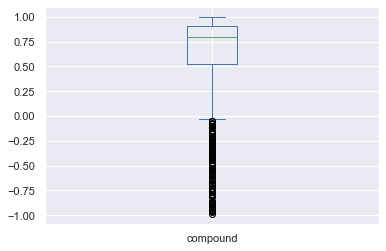

In [79]:
# View a boxplot of general sentiment for reviews

%matplotlib inline
import matplotlib.pyplot as plt

# Create boxplot
_plot = reviewpolarity_pd.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

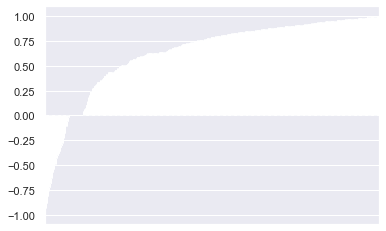

In [83]:
# Create a histogram of sentiment of reviews
%matplotlib inline
import matplotlib.pyplot as plt

_plot = reviewpolarity_pd.reset_index()['compound'].sort_values()
ax1 = plt.axes()
_plot.plot(kind='bar')

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

In [113]:
# Run through a dictionary comprehension to take every summary 

all_summary2_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in sentiment_clean['summary_token']}

In [114]:
# Analyse the sentiment of each review
summarypolarity_pd = pd.DataFrame(all_summary2_polarity).T

# View the DataFrame.
summarypolarity_pd

,neg,neu,pos,compound
the fact that 50 of this space is wasted on art and not terribly informative or needed art,0.145,0.723,0.132,-0.0711
another worthless dungeon masters screen from galeforce9,0.326,0.674,0.000,-0.4404
pretty but also pretty useless,0.306,0.165,0.529,0.4019
five stars,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182
...,...,...,...,...
this is a fun card game for people who like words,0.000,0.580,0.420,0.7003
sort of a card game equivalent of scrabble and a lot easier,0.000,0.763,0.237,0.4215
great game to keep the mind active,0.000,0.424,0.576,0.7783
a great mind game,0.000,0.328,0.672,0.6249


In [115]:
# Get the most negative summaries
summarypolarity_pd.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
disappointing,1.000,0.000,0.0,-0.4939
meh,1.000,0.000,0.0,-0.0772
frustrating,1.000,0.000,0.0,-0.4404
boring,1.000,0.000,0.0,-0.3182
disappointed,1.000,0.000,0.0,-0.4767
defective poor qc,0.857,0.143,0.0,-0.7184
not great,0.767,0.233,0.0,-0.5096
mad dragon,0.762,0.238,0.0,-0.4939
no 20 sided die,0.753,0.247,0.0,-0.7269
damaged product,0.744,0.256,0.0,-0.4404


In [116]:
# Get the most positive summary
summarypolarity_pd.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
love,0.0,0.0,1.0,0.6369
great helper,0.0,0.0,1.0,0.7579
great,0.0,0.0,1.0,0.6249
cute,0.0,0.0,1.0,0.4588
super fun,0.0,0.0,1.0,0.8020
ok ok,0.0,0.0,1.0,0.5267
wonderful,0.0,0.0,1.0,0.5719
perfect,0.0,0.0,1.0,0.5719
good fun,0.0,0.0,1.0,0.7351
thanks,0.0,0.0,1.0,0.4404


<AxesSubplot:>

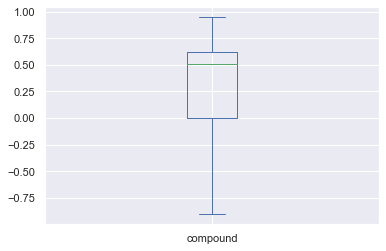

In [123]:
# View a boxplot of general sentiment for summary

%matplotlib inline
import matplotlib.pyplot as plt

# Create boxplot
_summary = summarypolarity_pd.reset_index()['compound'].sort_values()
_summary.plot(kind='box')

